# <center><font size="6">Construção dos modelos e resultados do projeto<center>

link do projeto: https://github.com/Egmara/Machine-Learning-Projeto-UFPR-Reconhecimento-de-algarismos

# <font size="6">Classificadores</font>

<font size="3">Os parâmetros listados foram otimizados usando cross validation.</font>

<font color="green"><font size="5">1. Rede Neural</font>

<font size="3">MLPClassifier(hidden_layer_sizes=(75), alpha=1e-4, solver='lbfgs', verbose=False)</font>

<font color="green"><font size="5">2. Floresta </font>

<font size="3">RandomForestClassifier(max_depth = 12, n_estimators = 75)</font>

<font color="green"><font size="5">3. SVC </font>

<font size="3">SVC(kernel='rbf', gamma = 'auto', C = 4)</font>

<font color="green"><font size="5">3. Rede Neural Convolucional (CNN) </font>

<font size="3">Estrutura disponível em 'gera_clf_cnn.py'</font>

# <font size="6">Avaliando o tamanho do banco de dados</font>

<font size="3">Treinamento com Banco de Dados de tamanho variado.</font>

<font color="black"><font size="3">-> Banco de Dados total:</font>

<center><font color="black"><font size="3"> 15 folhas * 15 linhas * 10 algarismos = 2250 algarismos</font><center>

<font size="3">-> Selecão da quantidade de algarismos para geração de alguns modelos.</font>

<center><font color="black"><font size="3">Modelo 1: 150 algarismos
    <br>Modelo 2: 300 algarismos
    <br>...
    <br>Modelo 15: 2250 algarismos</font><center>

In [1]:
# scores
import numpy as np
scores = np.load('Banco de dados/Saidas/scores_redeneural.npy')
for i, score in zip(range(1,16,1), scores):
    print('Modelo '+str(i)+': ',score)

Modelo 1:  0.7666666666666667
Modelo 2:  0.8
Modelo 3:  0.8444444444444444
Modelo 4:  0.8833333333333333
Modelo 5:  0.84
Modelo 6:  0.9
Modelo 7:  0.919047619047619
Modelo 8:  0.8458333333333333
Modelo 9:  0.9111111111111111
Modelo 10:  0.92
Modelo 11:  0.9272727272727272
Modelo 12:  0.8944444444444445
Modelo 13:  0.9205128205128205
Modelo 14:  0.9095238095238095
Modelo 15:  0.8844444444444445


<font size="4">O score oscila em torno de 91% após 7 linhas. Ou seja, com a ténica usada para construir o banco de dados não há vantagem em coletar mais que 7 linhas por indivíduo. </font>

# <font size="6">Resultados</font>

In [2]:
import cv2
import matplotlib.pyplot as plt

# carrega os classificadores salvos
import joblib
clf_redeneural = joblib.load('Modelos_de_Classificacao/clf_redeneural.pkl')
clf_floresta = joblib.load('Modelos_de_Classificacao/clf_floresta.pkl')
clf_svc = joblib.load('Modelos_de_Classificacao/clf_svc.pkl')
clf_cnn = joblib.load('Modelos_de_Classificacao/clf_cnn.pkl')
modelos = {'rede_neural': clf_redeneural, 'floresta': clf_floresta, 'svc': clf_svc, 'cnn': clf_cnn}

# carrega funcao de classificacao do teste
from classifica_teste import classifica_teste

C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator LabelBinarizer from version 0.21.2 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\user\Anaconda3\lib\site-packages\sklearn\base.py:306: UserWarning: Trying to unpickle estimator MLPClassifier from version 0.21.2 when using version 0.21.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


# Teste 1

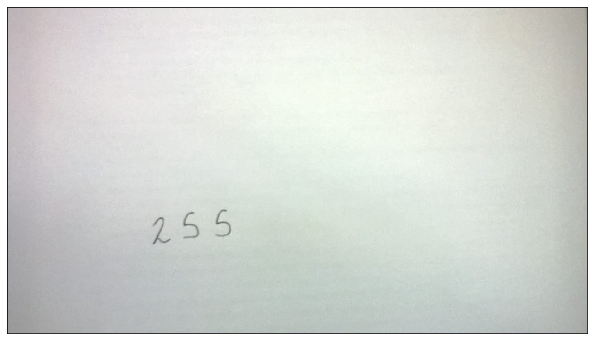

In [3]:
img = cv2.imread('testes/teste1.jpeg')
plt.figure(figsize=(12,6))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [4]:
# chama funcao
resultados = classifica_teste('testes/teste1.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}, \nSVC: {resultados[2]}, \nCNN: {resultados[3]}')

Rede Neural: [2 5 5], 
Floresta: [2 5 5], 
SVC: [8 5 5], 
CNN: [2 5 5]


<font size="4">Gabarito:<font color="red"> [2, 5, 5]</font>

<font size="4">Acertos: 
<br>-> Floresta: 3/3
<br>-> Rede Neural: 3/3
<br>-> SVC: 2/3
<br>-> CNN: 3/3

# Teste 2

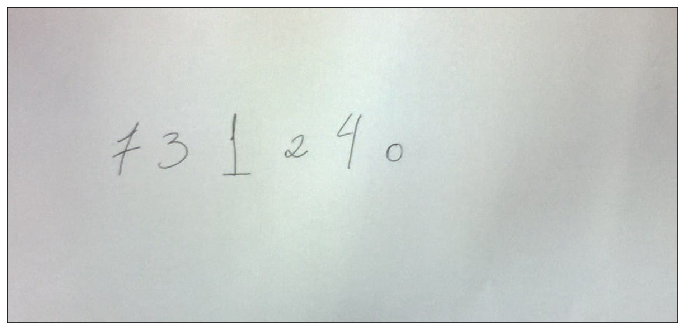

In [5]:
img = cv2.imread('testes/teste2.jpeg')
plt.figure(figsize=(12,6))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [6]:
# chama funcao
resultados = classifica_teste('testes/teste2.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}, \nSVC: {resultados[2]}, \nCNN: {resultados[3]}')

Rede Neural: [0 2 3 7 4 1], 
Floresta: [0 2 5 1 4 1], 
SVC: [0 2 3 1 9 1], 
CNN: [0 2 3 7 4 1]


<font size="4">Gabarito:<font color="red"> [0, 2, 3, 7, 4, 1]</font>

<font size="4">Acertos: 
<br>-> Floresta: 4/6
<br>-> Rede Neural: 4/6
<br>-> SVC: 4/6
<br>-> CNN: 6/6

# Teste 3

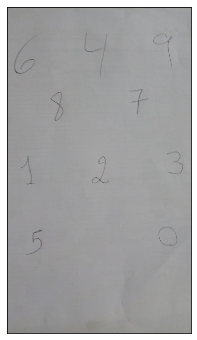

In [7]:
img = cv2.imread('testes/teste3.jpeg')
plt.figure(figsize=(12,6))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [8]:
# chama funcao
resultados = classifica_teste('testes/teste3.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}, \nSVC: {resultados[2]}, \nCNN: {resultados[3]}')

Rede Neural: [5 0 2 1 3 8 7 6 9 4], 
Floresta: [5 0 2 4 3 9 7 6 4 4], 
SVC: [5 0 2 1 3 9 7 6 9 4], 
CNN: [5 0 2 1 3 8 7 6 9 4]


<font size="4">Gabarito:<font color="red"> [5, 0, 2, 1, 3, 8, 7, 6, 9, 4]</font>

<font size="4">Acertos: 
<br>-> Floresta: 7/10
<br>-> Rede Neural: 10/10
<br>-> SVC: 9/10
<br>-> CNN: 10/10

# Teste 4

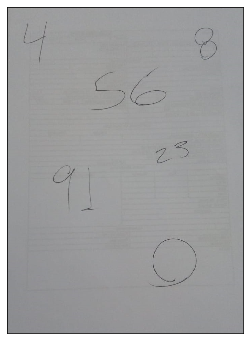

In [9]:
img = cv2.imread('testes/teste4.jpeg')
plt.figure(figsize=(12,6))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [10]:
# chama funcao
resultados = classifica_teste('testes/teste4.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}, \nSVC: {resultados[2]}, \nCNN: {resultados[3]}')

Rede Neural: [0 1 9 2 5 5 2 8 4], 
Floresta: [1 1 4 1 9 5 1 3 4], 
SVC: [2 1 9 2 9 5 5 8 4], 
CNN: [0 1 9 2 5 5 2 8 4]


<font size="4">Gabarito:<font color="red"> [0, 1, 9, 2, 3, 5, 6, 8, 4]</font>

<font size="4">Acertos: 
<br>-> Floresta: 3/9
<br>-> Rede Neural: 4/9
<br>-> SVC: 6/9
<br>-> CNN: 7/9

# Teste 5

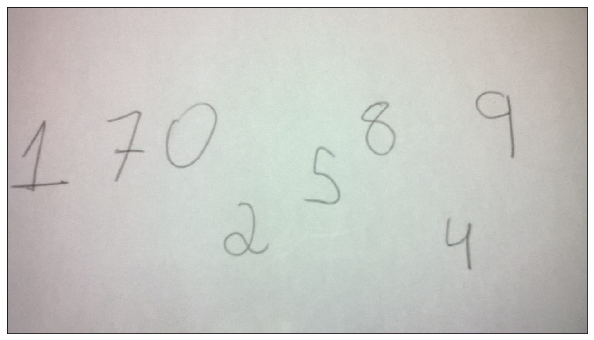

In [11]:
img = cv2.imread('testes/teste5.jpeg')
plt.figure(figsize=(12,6))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [12]:
# chama funcao
resultados = classifica_teste('testes/teste5.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}, \nSVC: {resultados[2]}, \nCNN: {resultados[3]}')

Rede Neural: [4 2 5 1 7 0 8 9], 
Floresta: [4 1 5 1 7 0 0 9], 
SVC: [4 2 5 1 7 0 8 9], 
CNN: [4 2 5 1 7 0 8 9]


<font size="4">Gabarito:<font color="red"> [4, 2, 5, 1, 7, 0, 8, 9]</font>

<font size="4">Acertos: 
<br>-> Floresta: 6/8
<br>-> Rede Neural: 7/8
<br>-> SVC: 8/8
<br>-> CNN: 8/8

# Teste 6

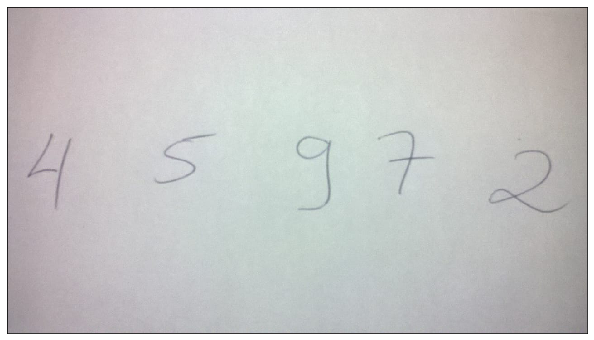

In [13]:
img = cv2.imread('testes/teste6.jpeg')
plt.figure(figsize=(12,6))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [14]:
# chama funcao
resultados = classifica_teste('testes/teste6.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}, \nSVC: {resultados[2]}, \nCNN: {resultados[3]}')

Rede Neural: [2 9 5 4 7], 
Floresta: [2 9 5 4 1], 
SVC: [2 9 5 4 7], 
CNN: [2 9 5 4 7]


<font size="4">Gabarito:<font color="red"> [2, 9, 5, 4, 7]</font>

<font size="4">Acertos: 
<br>-> Floresta: 4/5
<br>-> Rede Neural: 5/5
<br>-> SVC: 5/5
<br>-> CNN: 5/5

<font size="6">Resultado final:

<font size="4">-> Floresta: <font color="red">27/41<font color=black>. Score: <font color="red">0.6585<font color=black>
<br>-> Rede Neural: <font color="red">33/41<font color=black>. Score: <font color="red">0.8049</font>
<br>-> SVC: <font color="red">34/41<font color=black>. Score: <font color="red">0.8293</font>
<br>-> CNN: <font color="red">39/41<font color=black>. Score: <font color="red">0.9512</font>

# Novo Teste

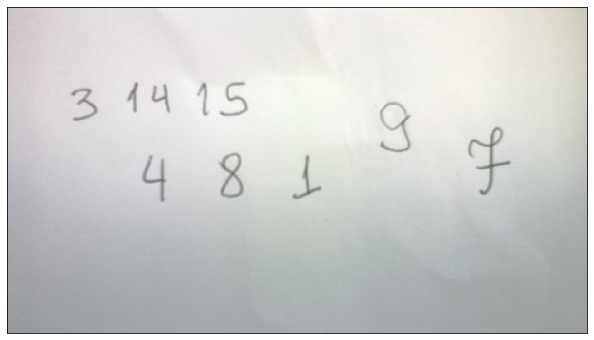

In [15]:
# teste com os profs
img = cv2.imread('testes/teste7.jpeg')
plt.figure(figsize=(12,6))
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)
plt.imshow(img[:,:,::-1])

In [16]:
# chama funcao
resultados = classifica_teste('testes/teste7.jpeg', modelos)

# mostra resultados
print(f'Rede Neural: {resultados[0]}, \nFloresta: {resultados[1]}, \nSVC: {resultados[2]}, \nCNN: {resultados[3]}')

Rede Neural: [4 1 8 7 9 3 4 1 5 1], 
Floresta: [4 1 8 1 9 3 4 1 5 1], 
SVC: [4 1 8 8 3 3 9 1 5 1], 
CNN: [4 1 8 7 9 3 4 1 5 1]


<font size="4">Gabarito:<font color="red"> [4, 1, 8, 7, 9, 3, 4, 1, 5, 1]</font>

<font size="4">Acertos (Teste com profs): 
<br>-> Floresta: 9/10
<br>-> Rede Neural: 9/10
<br>-> SVC: 7/10
<br>-> CNN: 10/10